In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [4]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
X_train.shape

(1347, 64)

In [8]:
%%time
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

Wall time: 13 ms


KNeighborsClassifier()

In [9]:
knn_clf.score(X_test, y_test)

0.9888888888888889

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [14]:
%%time
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

Wall time: 1e+03 µs


KNeighborsClassifier()

In [16]:
knn_clf.score(X_test_reduction, y_test)

0.6222222222222222

In [17]:
pca.explained_variance_ratio_

array([0.1477438 , 0.13554964])

In [18]:
pca =PCA(n_components=X_train.shape[1])
pca.fit(X_train)
pca.explained_variance_ratio_

array([1.47743802e-01, 1.35549640e-01, 1.18949601e-01, 8.58881606e-02,
       5.90854546e-02, 4.85758566e-02, 4.35954035e-02, 3.66521878e-02,
       3.40308789e-02, 3.08244614e-02, 2.33224178e-02, 2.27734727e-02,
       1.81977370e-02, 1.76956058e-02, 1.50706098e-02, 1.35860574e-02,
       1.30927134e-02, 1.23215420e-02, 1.04393322e-02, 9.10871749e-03,
       8.68370644e-03, 7.86407639e-03, 7.58565794e-03, 7.02734207e-03,
       6.68069927e-03, 5.86454454e-03, 5.68936434e-03, 5.06895525e-03,
       4.60999222e-03, 4.21336293e-03, 3.62402456e-03, 3.54057272e-03,
       3.32479783e-03, 3.18188250e-03, 3.05895960e-03, 2.93070454e-03,
       2.48389115e-03, 2.22148545e-03, 2.17891758e-03, 2.04778099e-03,
       1.83289193e-03, 1.57378090e-03, 1.45287713e-03, 1.40337286e-03,
       1.18067779e-03, 1.05797030e-03, 9.49318021e-04, 7.84779866e-04,
       5.53187233e-04, 3.98334226e-04, 2.23544105e-04, 7.86666349e-05,
       5.83492226e-05, 4.07378132e-05, 8.71640664e-06, 8.62101285e-06,
      

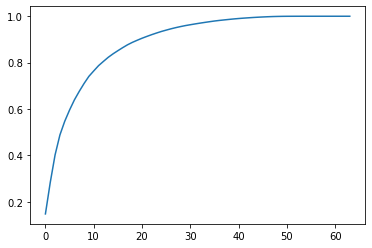

In [21]:
plt.plot([i for i in range(X_train.shape[1])], [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(X_train.shape[1])])
plt.show()

In [22]:
pca = PCA(0.95)
pca.fit(X_train)

PCA(n_components=0.95)

In [23]:
pca.n_components_

28

In [24]:
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [25]:
%%time
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

Wall time: 5 ms


KNeighborsClassifier()

In [26]:
knn_clf.score(X_test_reduction, y_test)

0.9888888888888889

In [27]:
pca = PCA(n_components=2)
pca.fit(X)
X_reduction = pca.transform(X)

In [28]:
X_reduction.shape

(1797, 2)

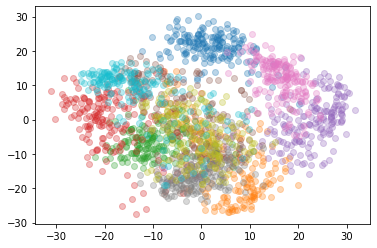

In [31]:
for i in range(10):
    plt.scatter(X_reduction[y==i, 0], X_reduction[y==i, 1], alpha=0.3)
plt.show()